In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import get_spiking_times

# == plotting setup ==
plt.style.use('seaborn-v0_8-whitegrid') 
mpl.rcParams.update({
    # Axes settings
    "axes.titlesize": 14,     # Font size for axes titles
    "axes.labelsize": 12,     # Font size for axes labels
    
    # Tick settings
    "xtick.labelsize": 10,    # Font size for x-axis tick labels
    "ytick.labelsize": 10,    # Font size for y-axis tick labels
    
    # Legend settings
    "legend.fontsize": 10,    # Font size for legend
    
    # Figure settings
    "figure.figsize": (16, 8), # Default figure size (width, height) in inches
    "figure.dpi": 100,        # Dots per inch
    
    # Lines
    "lines.linewidth": 2,     # Line width
    "lines.markersize": 6,    # Marker size
    
    # Grid settings
    "grid.color": "gray",     # Grid color
    "grid.linestyle": "--",   # Grid line style
    "grid.linewidth": 0.5,    # Grid line width
    "grid.alpha": 0.7,        # Grid transparency

    # Use Computer Modern fonts for math text
    "mathtext.fontset": "cm",  # Set math text to use CM fonts
})

from stg import simulate_individual_t_eval
from stg import get_default_u0
from stg import get_default_parameters
from utils import gamma_uniform_mean_std_matching

In [19]:
def get_individual(f=1/4):
    g_bar_range_Na = [0, 8000]
    g_bar_range_Kd = [0, 350]
    g_bar_range_CaT = [0, 12]
    g_bar_range_CaS = [0, 50]
    g_bar_range_KCa = [0, 250]
    g_bar_range_A = [0, 600]
    g_bar_range_H = [0, 0.7]
    g_bar_range_leak = [0, 0.02]

    g_bar_range_Na = [g_bar_range_Na[0] + (g_bar_range_Na[1] - g_bar_range_Na[0])*f, g_bar_range_Na[1] - (g_bar_range_Na[1] - g_bar_range_Na[0])*f]
    g_bar_range_Kd = [g_bar_range_Kd[0] + (g_bar_range_Kd[1] - g_bar_range_Kd[0])*f, g_bar_range_Kd[1] - (g_bar_range_Kd[1] - g_bar_range_Kd[0])*f]
    g_bar_range_CaT = [g_bar_range_CaT[0] + (g_bar_range_CaT[1] - g_bar_range_CaT[0])*f, g_bar_range_CaT[1] - (g_bar_range_CaT[1] - g_bar_range_CaT[0])*f]
    g_bar_range_CaS = [g_bar_range_CaS[0] + (g_bar_range_CaS[1] - g_bar_range_CaS[0])*f, g_bar_range_CaS[1] - (g_bar_range_CaS[1] - g_bar_range_CaS[0])*f]
    g_bar_range_KCa = [g_bar_range_KCa[0] + (g_bar_range_KCa[1] - g_bar_range_KCa[0])*f, g_bar_range_KCa[1] - (g_bar_range_KCa[1] - g_bar_range_KCa[0])*f]
    g_bar_range_A = [g_bar_range_A[0] + (g_bar_range_A[1] - g_bar_range_A[0])*f, g_bar_range_A[1] - (g_bar_range_A[1] - g_bar_range_A[0])*f]
    g_bar_range_H = [g_bar_range_H[0] + (g_bar_range_H[1] - g_bar_range_H[0])*f, g_bar_range_H[1] - (g_bar_range_H[1] - g_bar_range_H[0])*f]
    g_bar_range_leak = [g_bar_range_leak[0] + (g_bar_range_leak[1] - g_bar_range_leak[0])*f, g_bar_range_leak[1] - (g_bar_range_leak[1] - g_bar_range_leak[0])*f]
    g_bar_leak_gamma = gamma_uniform_mean_std_matching(*g_bar_range_leak)

    g_leak = np.random.gamma(g_bar_leak_gamma[0], g_bar_leak_gamma[1]) 
    g_Na = np.random.uniform(*g_bar_range_Na) * g_leak/0.01
    g_Kd = np.random.uniform(*g_bar_range_Kd) * g_leak/0.01
    g_CaT = np.random.uniform(*g_bar_range_CaT)  * g_leak/0.01
    g_CaS = np.random.uniform(*g_bar_range_CaS) * g_leak/0.01
    g_KCa = np.random.uniform(*g_bar_range_KCa) * g_leak/0.01
    g_A = np.random.uniform(*g_bar_range_A) * g_leak/0.01
    g_H = np.random.uniform(*g_bar_range_H) * g_leak/0.01
    return np.array([g_Na, g_Kd, g_CaT, g_CaS, g_KCa, g_A, g_H, g_leak])

# Example usage
individual = get_individual(f=1/4)
print(individual)

[5.41575122e+03 1.54117123e+02 7.49675484e+00 2.23852187e+01
 1.17557592e+02 4.71474665e+02 4.17821070e-01 1.05255373e-02]


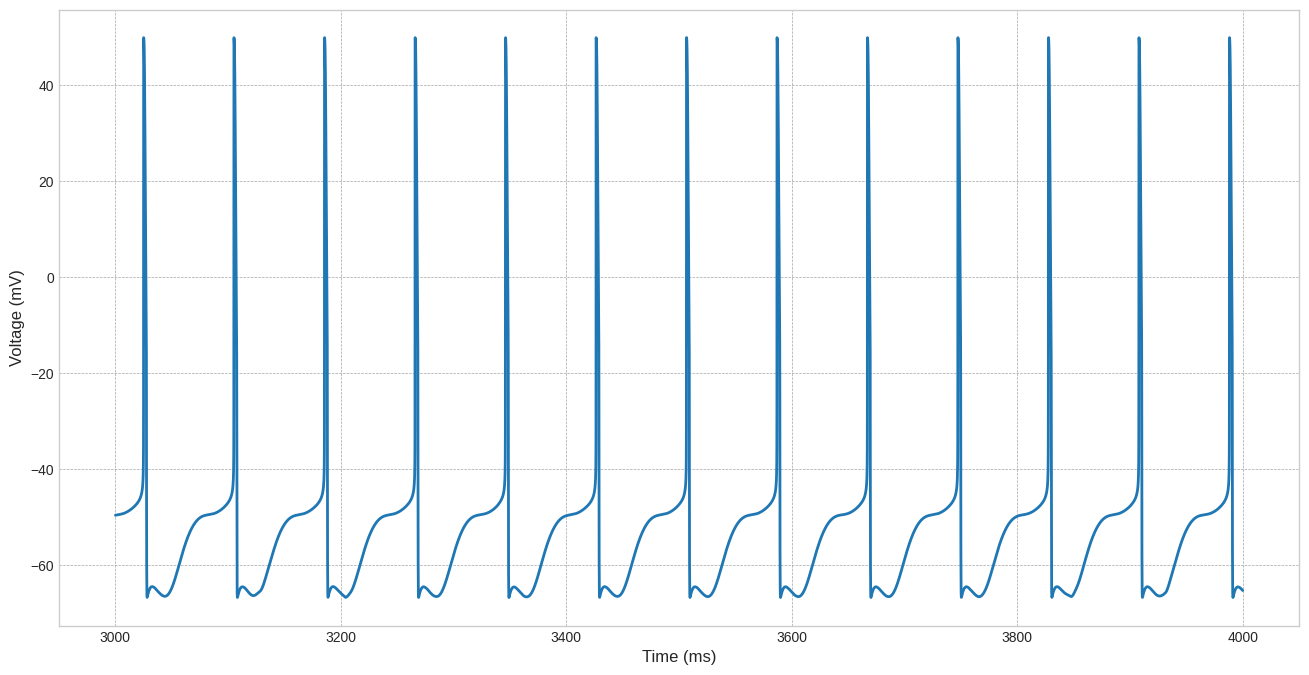

In [20]:
t_eval = np.arange(3000, 4000, 0.05)
g_bar = individual
# 5 spikes per burst : 4.69750119e+03 1.92940726e+02 3.71698600e+00 2.91164335e+01 1.16844777e+02 2.63791575e+02 1.64750993e-01 8.55285962e-03
# 4 spikes per burst : 2.38851072e+03 1.40593853e+02 2.70201889e+00 2.47336888e+01 9.59762172e+01 1.89533226e+02 4.21119519e-01 8.90104376e-03
# 3 spikes per burst : 1.97865163e+03 1.76184886e+02 3.92066318e+00 1.36218085e+01 9.42548146e+01 1.39670733e+02 3.61950890e-01 7.83620352e-03
# 2 spikes per burst : 2.34915834e+03 9.69899089e+01 6.49146505e+00 1.36726006e+01 1.37974580e+02 3.06697816e+02 2.82749697e-01 7.69057682e-03
#g_bar = np.array([1.97865163e+03, 1.76184886e+02, 3.92066318e+00, 1.36218085e+01, 9.42548146e+01, 1.39670733e+02, 3.61950890e-01, 7.83620352e-03])
# irreuglar : 2.15522999e+03, 1.04121467e+02, 6.26271855e+00, 2.61338719e+01, 9.56090277e+01, 3.73249305e+02, 3.41783650e-01, 8.41375461e-03]
sol = simulate_individual_t_eval((get_default_u0(), g_bar, t_eval, get_default_parameters()))


fig, ax = plt.subplots(1, 1)
ax.plot(sol[0, :], sol[1, :])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (mV)')
# save as a vectorized svg
plt.show()

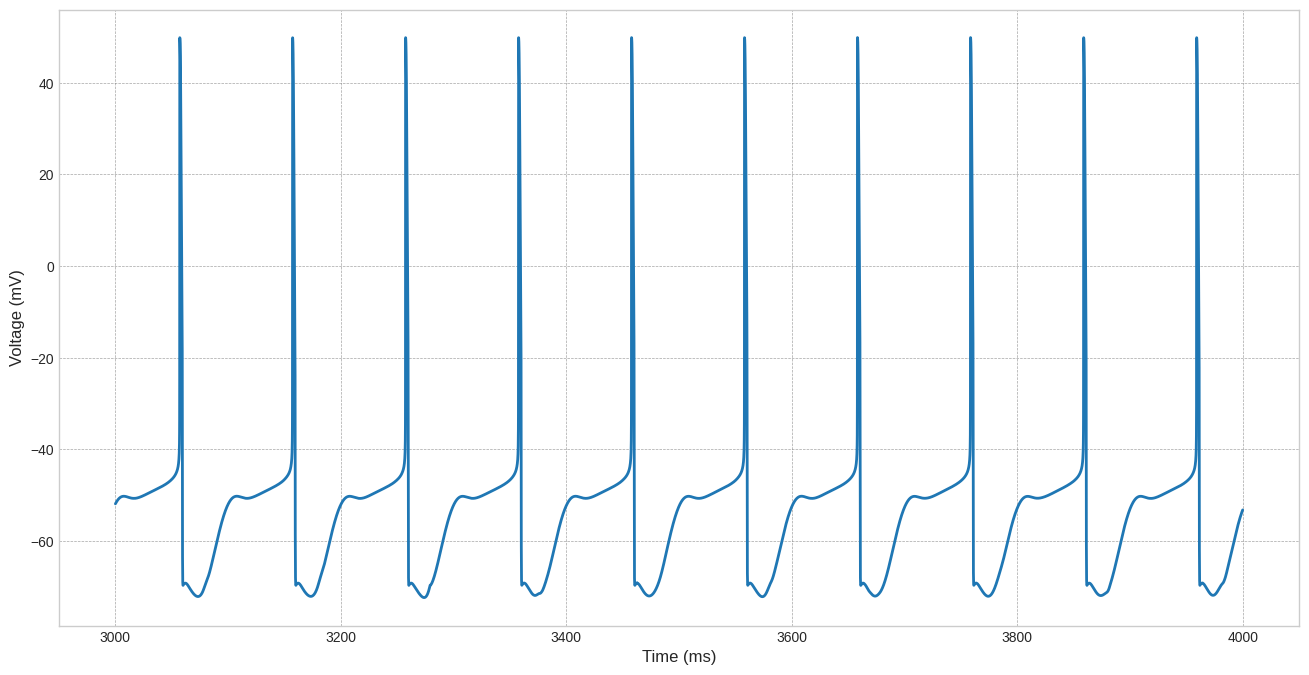

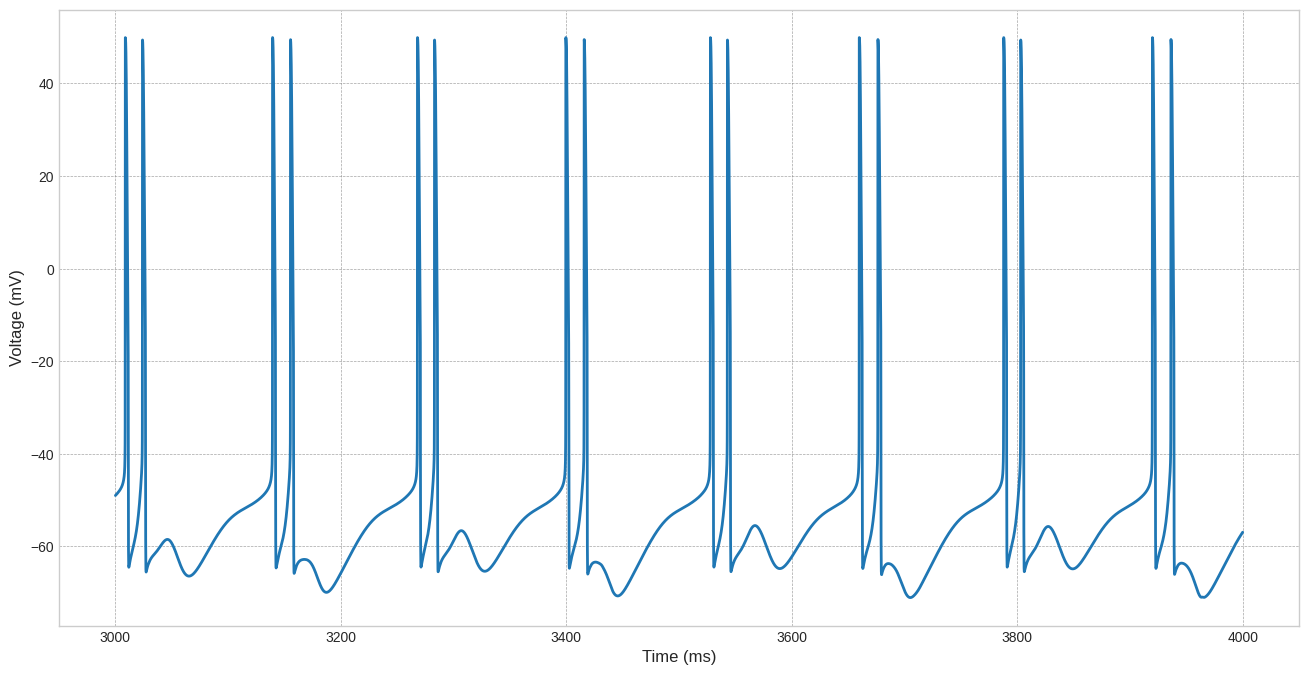

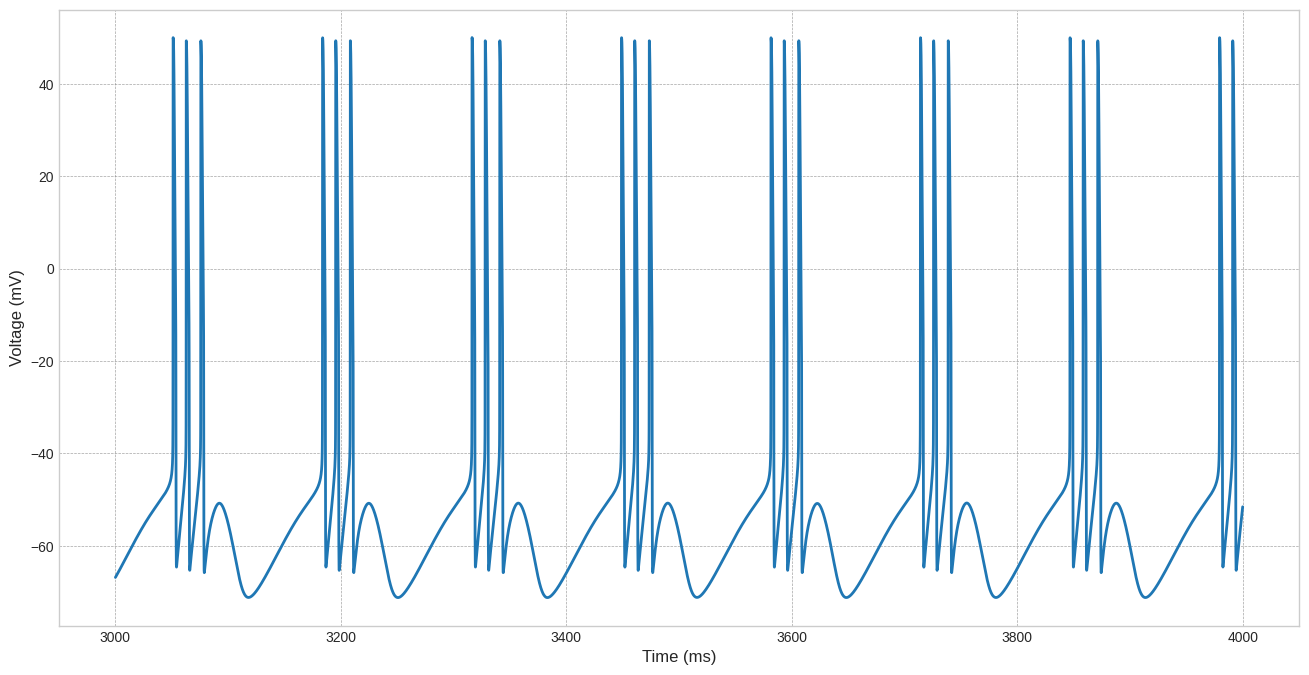

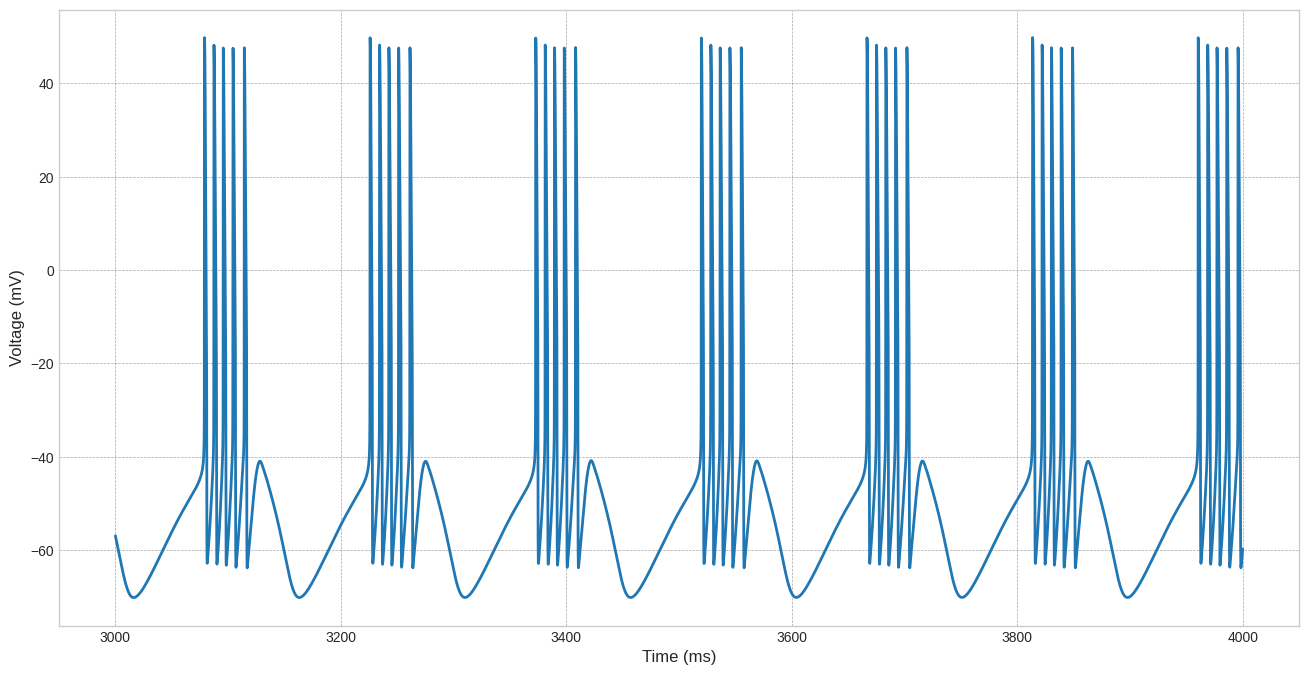

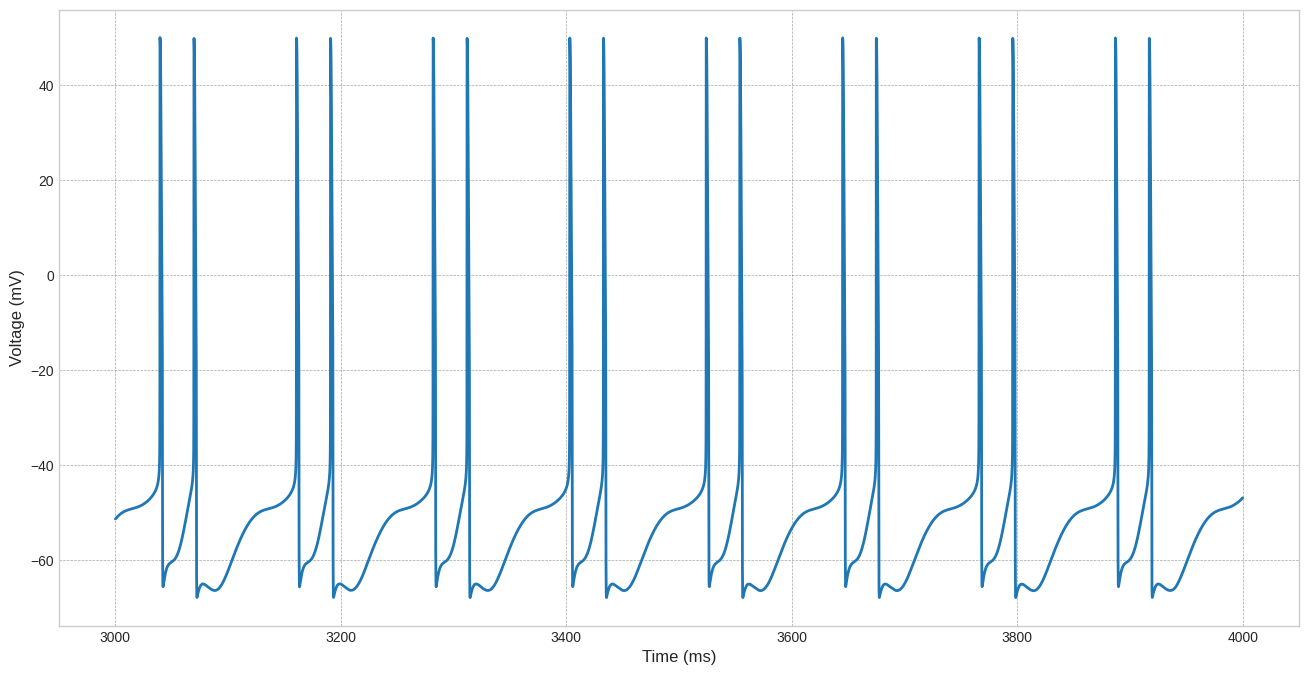

In [21]:
results = []
N = 5
for i in range(N):
    individual = get_individual(f=1/4)
    t_eval = np.arange(3000, 4000, 0.05)
    g_bar = individual
    sol = simulate_individual_t_eval((get_default_u0(), g_bar, t_eval, get_default_parameters()))
    fig, ax = plt.subplots(1, 1)
    ax.plot(sol[0, :], sol[1, :])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Voltage (mV)')
    plt.show()

    sp = get_spiking_times(sol[0, :], sol[1, :])[1]
    results.append(sp)

import pandas as pd

ID = np.arange(1, N + 1)
data = []

for i in range(N):
    times_str = ', '.join(map(str, results[i]))  # Convert to comma-separated string
    # add'[' and ']' to the string
    times_str = '[' + times_str + ']'
    data.append({'ID': ID[i], 'spiking_times': times_str})
df = pd.DataFrame(data)
df.to_csv('stg_set.csv', index=False)
